In [1]:
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Step 1: Generate Synthetic Dataset
np.random.seed(42)
n_samples = 500

# Core features
temperature = np.random.uniform(1, 10, n_samples)       # °C in fridge
humidity = np.random.uniform(30, 90, n_samples)         # % humidity
food_type = np.random.choice(['apple','banana','chicken','lettuce'], n_samples)
packaging = np.random.choice(['open','closed'], n_samples)
light_exposure = np.random.uniform(0, 4, n_samples)     # hours/day
door_open_freq = np.random.randint(1, 15, n_samples)    # times/day

# Encode categorical features
food_type_map = {'apple':0, 'banana':1, 'chicken':2, 'lettuce':3}
packaging_map = {'open':0, 'closed':1}

food_type_encoded = np.array([food_type_map[f] for f in food_type])
packaging_encoded = np.array([packaging_map[p] for p in packaging])

# Target: Days Until Spoilage (simulated)
days_until_spoilage = (
    (15 - temperature) +                # cooler → lasts longer
    packaging_encoded*2 -               # closed packaging → lasts longer
    food_type_encoded*0.5 -             # different spoilage rates by food
    light_exposure*1.2 -                # more light → spoil faster
    door_open_freq*0.5 +                # frequent openings → spoil faster
    np.random.normal(0,1,n_samples)    # noise
)

# Create DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Food_Type': food_type_encoded,
    'Packaging': packaging_encoded,
    'Light_Exposure': light_exposure,
    'Door_Opens': door_open_freq,
    'Days_Until_Spoilage': days_until_spoilage
})

df.head()

,Temperature,Humidity,Food_Type,Packaging,Light_Exposure,Door_Opens,Days_Until_Spoilage
0,4.370861,71.889703,2,1,2.076327,12,3.944111
1,9.556429,62.165782,3,0,1.916728,7,-1.650452
2,7.587945,48.571657,1,0,0.102568,3,5.103807
3,6.387926,78.827701,3,1,1.364991,7,2.381281
4,2.404168,71.083870,3,1,1.520782,12,3.855941


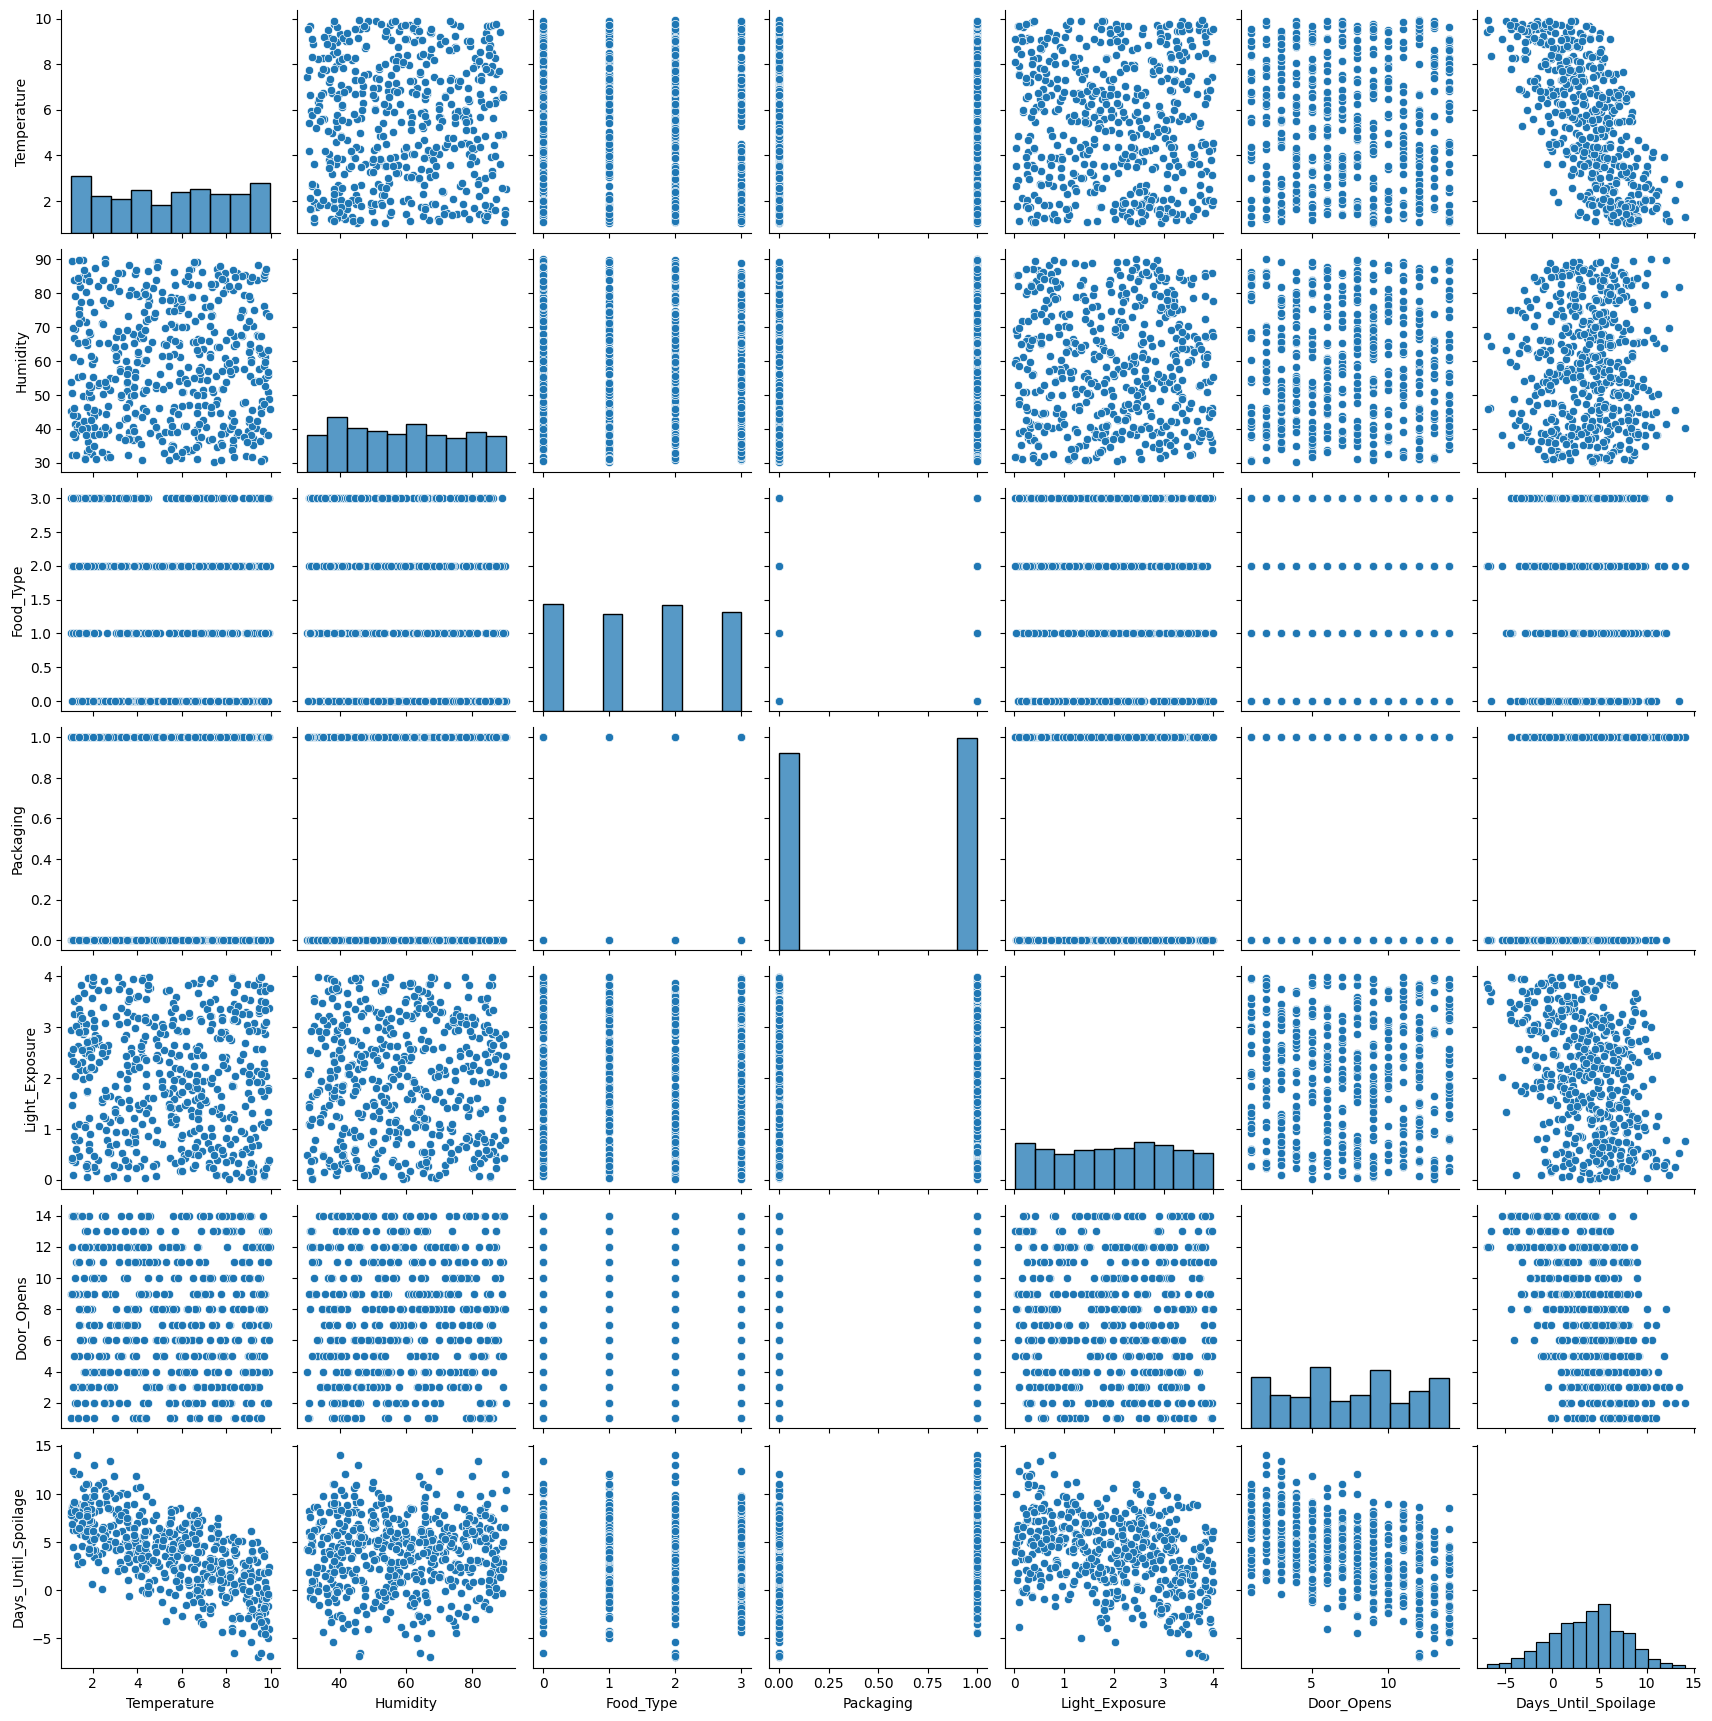

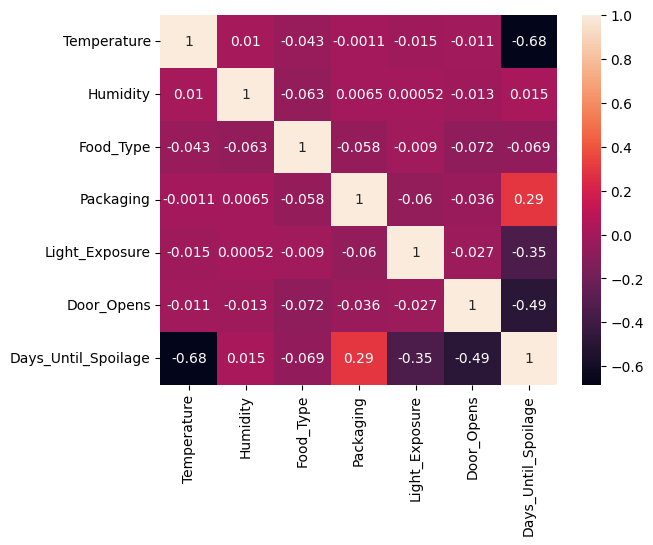

In [5]:
#exploring data
# Step 2: Explore Data (Optional)
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True)
plt.show()


In [6]:
#splitting and training data
# Step 3: Split Data
X = df[['Temperature','Humidity','Food_Type','Packaging','Light_Exposure','Door_Opens']]
y = df['Days_Until_Spoilage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 1.67
R2 Score: 0.88


In [7]:
# Function to Predict and Visualize Freshness
def predict_and_visualize(temp, hum, food, pack, light, door):
    # Map categorical
    food_encoded = food_type_map[food]
    pack_encoded = packaging_map[pack]

    # Create input
    sample = pd.DataFrame({
        'Temperature':[temp],
        'Humidity':[hum],
        'Food_Type':[food_encoded],
        'Packaging':[pack_encoded],
        'Light_Exposure':[light],
        'Door_Opens':[door]
    })

    # Predict
    days = model.predict(sample)[0]

    # Color-coded freshness (Spotify-style)
    if days > 10:
        color = 'green'
    elif days > 5:
        color = 'yellow'
    else:
        color = 'red'

    # Plot horizontal bar
    plt.figure(figsize=(6,1))
    plt.barh([0], [days], color=color, height=0.5)
    plt.xlim(0,15)
    plt.title(f"Predicted Days Until Spoilage: {days:.1f}")
    plt.xlabel("Days")
    plt.yticks([])
    plt.show()

    return days


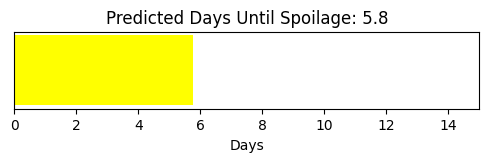

np.float64(5.771338228839892)

In [8]:
#testing the model
# Step 6: Test Example
predict_and_visualize(
    temp=5,
    hum=50,
    food='banana',
    pack='open',
    light=2,
    door=5
)
